# Project 2 Database Analysis on Bone Marrow Transplant in Children
### A work by Lucía Schmidt and Gabriela Gutiérrez-Colomer 

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

Data loading in cvs form. 

In [20]:
data = pd.read_csv("csv_result-bone-marrow.csv")  #Load data

pd.set_option('display.max_columns', None)  #Avoid python truncating dataset and showing all columns.
pd.set_option('display.max_rows', None)

In [21]:
data.head(10)

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,1,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,plus,present,ALL,malignant,other,matched,3,10/10,matched,0,0,matched,high,peripheral_blood,no,7.20,5.38,1.33876,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,2,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,plus,absent,ALL,malignant,other,matched,0,10/10,matched,0,0,matched,low,bone_marrow,no,4.50,0.41,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,3,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,plus,present,ALL,malignant,other,matched,2,10/10,matched,0,0,matched,low,bone_marrow,no,7.94,0.42,19.01323,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,4,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,plus,absent,AML,malignant,other,mismatched,1,10/10,matched,0,0,matched,low,bone_marrow,no,4.25,0.14,29.481647,23.0,29.0,yes,yes,19.0,?,no,53.0,1
4,5,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,minus,present,chronic,malignant,other,mismatched,0,9/10,matched,2,1,one_antigen,high,peripheral_blood,no,51.85,13.05,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0
5,6,27.391781,yes,AB,?,8.9,yes,5_10,male,40.0,0,plus,present,chronic,malignant,other,mismatched,?,10/10,matched,0,0,matched,high,bone_marrow,yes,3.27,0.39,8.412758,16.0,70.0,no,no,1000000.0,no,no,2800.0,0
6,7,34.520548,yes,0,absent,14.4,no,10_20,female,51.0,A,minus,?,AML,malignant,other,mismatched,?,10/10,matched,0,0,matched,low,peripheral_blood,no,17.78,7.39,2.406248,17.0,29.0,yes,yes,18.0,?,no,41.0,1
7,8,21.435616,yes,0,present,18.2,no,10_20,male,56.0,A,plus,absent,nonmalignant,nonmalignant,other,mismatched,1,7/10,mismatched,2,3,mismatched,low,bone_marrow,no,6.41,?,?,22.0,58.0,yes,yes,22.0,?,no,45.0,1
8,9,32.641096,yes,AB,absent,7.9,yes,5_10,male,20.5,0,plus,present,nonmalignant,nonmalignant,other,mismatched,2,10/10,matched,0,0,matched,low,peripheral_blood,no,23.54,6.24,3.772555,15.0,14.0,no,no,1000000.0,no,no,671.0,0
9,10,28.783562,yes,A,absent,4.7,yes,0_5,male,16.5,0,plus,present,nonmalignant,nonmalignant,female_to_male,mismatched,2,9/10,matched,1,2,DRB1_cell,low,peripheral_blood,no,7.69,7.43,1.035244,16.0,17.0,yes,no,1000000.0,no,no,676.0,0


## 1. Data Description -Bone Marrow Transplant in Children- 

In [22]:
data.shape

(187, 38)

In this database we will deal with: 
- 187 Patients. 
- 38 Variables. 

In [23]:
data.columns

Index(['id', 'donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status'],
      dtype='object')

`data.columns`obtains the variables of the database. In this case there are 38 variables. Compared to the number of patients, the amount of variables may be too high. 

In [24]:
data.describe(include='all')

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
count,187.000000,187.000000,187,187,187,187.000000,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187.000000,187,187,187.000000,187.000000,187,187,187.000000,187,187,187.000000,187.000000
unique,NaN,NaN,2,4,3,NaN,2,3,2,131,5,3,3,5,2,2,3,5,4,2,5,6,7,2,2,2,NaN,164,183,NaN,NaN,2,2,NaN,3,2,NaN,NaN
top,NaN,NaN,yes,0,absent,NaN,yes,10_20,male,33.0,A,plus,present,ALL,malignant,other,mismatched,2,10/10,matched,0,0,matched,low,peripheral_blood,no,NaN,?,?,NaN,NaN,yes,no,NaN,no,no,NaN,NaN
freq,NaN,NaN,104,73,113,NaN,99,89,112,5,75,158,100,68,155,155,134,57,94,159,93,93,94,118,145,164,NaN,5,5,NaN,NaN,112,147,NaN,128,159,NaN,NaN
mean,94.000000,33.472068,NaN,NaN,NaN,9.931551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.891781,NaN,NaN,26752.866310,90937.919786,NaN,NaN,775408.042781,NaN,NaN,938.743316,0.454545
std,54.126395,8.271826,NaN,NaN,NaN,5.305639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.914386,NaN,NaN,161747.200525,288242.407688,NaN,NaN,418425.252689,NaN,NaN,849.589495,0.499266
min,1.000000,18.646575,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790000,NaN,NaN,9.000000,9.000000,NaN,NaN,10.000000,NaN,NaN,6.000000,0.000000
25%,47.500000,27.039726,NaN,NaN,NaN,5.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.350000,NaN,NaN,13.000000,16.000000,NaN,NaN,1000000.000000,NaN,NaN,168.500000,0.000000
50%,94.000000,33.550685,NaN,NaN,NaN,9.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.720000,NaN,NaN,15.000000,21.000000,NaN,NaN,1000000.000000,NaN,NaN,676.000000,0.000000
75%,140.500000,40.117808,NaN,NaN,NaN,14.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.415000,NaN,NaN,17.000000,37.000000,NaN,NaN,1000000.000000,NaN,NaN,1604.000000,1.000000


Here we can extract many useful metrics, such as the most frequent output for "donor_AB0" that is blood group 0 with a frequency of 73 patients with it. Also, we can see that the minimum donor age is 18 years old and the maximum is 55. Interesting is also the fact that the most common output for "AB0_match" is a mismatch. 
This information helps us by providing statistical metrics.

## 2. Dealing with Missing Values 
### Do we have missing values in our database?

In our database missing values are presented as a ? mark. Those values need to be taken away or changed in order to be able to treat the data. If a model is applied it would not be able to work with those values.

In [25]:
(data == '?').sum(axis=0)

/Users/gabriela/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


id                            0
donor_age                     0
donor_age_below_35            0
donor_ABO                     0
donor_CMV                     2
recipient_age                 0
recipient_age_below_10        0
recipient_age_int             0
recipient_gender              0
recipient_body_mass           2
recipient_ABO                 1
recipient_rh                  2
recipient_CMV                14
disease                       0
disease_group                 0
gender_match                  0
ABO_match                     1
CMV_status                   16
HLA_match                     0
HLA_mismatch                  0
antigen                       1
allel                         1
HLA_group_1                   0
risk_group                    0
stem_cell_source              0
tx_post_relapse               0
CD34_x1e6_per_kg              0
CD3_x1e8_per_kg               5
CD3_to_CD34_ratio             5
ANC_recovery                  0
PLT_recovery                  0
acute_Gv

There are many null values in this database. This is not beneficial for the study of the data as the lack of information always causes the model to lose performance. To solve the problem, the correct approach is to replace the null values with the mean for continuous variables and the mode for discrete variables.
As we can see, **donor_CMV, recipient_body_mass, recipient_ABO, recipient_rh, recipient_CMV, ABO_match, CMV_status,CD3_x1e8_per_kg,CD3_to_CD34_ratio** and **extensive_chronic_GvHD** have null values.  

## What can we do to treat null values? 
In order to be able to process this data, we need to do several things. First, let's look at some problems: 
- Variables that should be float are objects. 
- It is not possible to convert a variable to float if it contains any data in string format. 

What can be done to solve this?
- We will eliminate the variable with the highest number of null values knowing that it could negatively affect our model. 
- We will eliminate the patients that have null values and thus convert the object variables to float, then we will recover the patients. 


The varibale **extensive_chronic_GvHD** has too many missing values for us to find a suitable predictor. We choose to eliminate this variable taking into account how this affects our model.

In [26]:
data = data.drop('extensive_chronic_GvHD',axis = 1)
data = data.drop('id',axis = 1)

Patients are dropped so the tranformation from object to **float** of some variables is not being affected. After the collection of statistics, patients that have been drop will be recover so null values can be replace, remember: 
- continous variables are replaced with the mean. 
- discrete or categorical variables are replaced with the median. 

In [27]:
# We drop patients with missing values so that they dont influence the predictor
data = data.drop([5,6,7,18,27,30,43,75,81,86,92,93,102,103,105,112,128,129,137,147,149,150,186],axis = 0)

In [28]:
data["recipient_body_mass"] = data.recipient_body_mass.astype(float)
#data["CMV_status"] = data.CMV_status.astype(float)
data["antigen"] = data.antigen.astype(float)
data["allel"] = data.allel.astype(float)
data["CD3_x1e8_per_kg"]=data.CD3_x1e8_per_kg.astype(float)
data["CD3_to_CD34_ratio"]=data.CD3_to_CD34_ratio.astype(float)

In [29]:
data.describe(include = 'all')

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,relapse,survival_time,survival_status
count,164.000000,164,164,164,164.000000,164,164,164,164.000000,164,164,164,164,164,164,164,164,164,164,164.000000,164.000000,164,164,164,164,164.000000,164.000000,164.000000,164.000000,164.000000,164,164,164.000000,164,164.000000,164.000000
unique,NaN,2,4,2,NaN,2,3,2,NaN,4,2,2,5,2,2,2,4,4,2,NaN,NaN,7,2,2,2,NaN,NaN,NaN,NaN,NaN,2,2,NaN,2,NaN,NaN
top,NaN,yes,A,absent,NaN,yes,10_20,male,NaN,A,plus,present,ALL,malignant,other,mismatched,2,10/10,matched,NaN,NaN,matched,low,peripheral_blood,no,NaN,NaN,NaN,NaN,NaN,yes,no,NaN,no,NaN,NaN
freq,NaN,90,65,100,NaN,87,78,99,NaN,64,140,95,60,136,137,115,55,81,140,NaN,NaN,81,104,128,145,NaN,NaN,NaN,NaN,NaN,100,129,NaN,138,NaN,NaN
mean,33.462646,NaN,NaN,NaN,9.757317,NaN,NaN,NaN,35.474390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.926829,0.756098,NaN,NaN,NaN,NaN,11.870018,4.632805,5.502774,18307.548780,67101.689024,NaN,NaN,780494.469512,NaN,994.146341,0.426829
std,8.080085,NaN,NaN,NaN,5.236177,NaN,NaN,NaN,19.355457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.994222,0.880058,NaN,NaN,NaN,NaN,9.554489,3.658901,10.041788,134416.091419,250907.163051,NaN,NaN,415171.299357,NaN,846.937516,0.496132
min,18.646575,NaN,NaN,NaN,0.700000,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.790000,0.040000,0.309048,10.000000,10.000000,NaN,NaN,10.000000,NaN,6.000000,0.000000
25%,27.594520,NaN,NaN,NaN,4.975000,NaN,NaN,NaN,18.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,5.430000,1.732500,1.819808,13.000000,15.750000,NaN,NaN,1000000.000000,NaN,201.500000,0.000000
50%,33.454794,NaN,NaN,NaN,9.500000,NaN,NaN,NaN,32.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,9.770000,4.325000,2.733703,15.000000,21.000000,NaN,NaN,1000000.000000,NaN,795.500000,0.000000
75%,39.776713,NaN,NaN,NaN,13.925000,NaN,NaN,NaN,49.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,15.412500,6.567500,5.766468,17.000000,30.500000,NaN,NaN,1000000.000000,NaN,1690.500000,1.000000


Now the varaibles that were objects and needed to be floats are changed. For example, if we look closely at `recipient_body_mass` it is now a float with its mean and std. 

The idea now is to create variables that allocate the statistics needed for replacement. 

In [46]:
#mean
mean_CD3_kg = data['CD3_x1e8_per_kg'].describe().loc['mean']
mean_CD3_ratio = data['CD3_to_CD34_ratio'].describe().loc['mean']
mean_recipient_body_mass = data['recipient_body_mass'].describe().loc['mean']
mean_antigen = data['antigen'].describe().loc['mean']
mean_allel = data['allel'].describe().loc['mean']
#median 
median_donorCMV = data['donor_CMV'].describe().loc['top']
median_reciAB0 = data['recipient_ABO'].describe().loc['top']
median_reci_rh = data['recipient_rh'].describe().loc['top']
median_reciCMV = data['recipient_CMV'].describe().loc['top']
median_AB0_match = data['ABO_match'].describe().loc['top']
median_CMVstatus = data['CMV_status'].describe().loc['top']

In [47]:
numerical_change = {"donor_age_below_35":     {"yes": 1, "no": 0},
                    "donor_CMV": {"present": 1, "absent":0},
                   "recipient_age_below_10":{"yes": 1, "no": 0},
                   "relapse":{"yes":1, "no":0}, 
                   "acute_GvHD_II_III_IV": {"yes":1, "no":0},
                   "acute_GvHD_III_IV": {"yes":1, "no":0},
                   "recipient_gender": {"female":1, "male":2},
                   "donor_ABO":{"A":1,"B":2,"AB":3,"0":4},
                   "recipient_ABO":{"A":1,"B":2,"AB":3,"0":4},
                   "recipient_rh":{"plus":1,"minus":0},
                   "disease":{"ALL":1,"AML":2,"chronic":3,"nonmalignant":0,"lymphoma":4},
                   "recipient_CMV":{"present":1,"absent":0},
                   "disease_group":{"malignant":1,"nonmalignant":0},
                   "gender_match":{"other":1,"female_to_male":0},
                   "ABO_match":{"matched":1, "mismatched":0},
                   "HLA_match":{"10/10":1,"9/10":0.9,"7/10":0.7,"8/10":0.8},
                   "HLA_mismatch":{"matched":1, "mismatched":0},
                   "HLA_group_1":{"matched":1,"mismatched":0,"one_antigen":2,"DRB1_cell":3,"one_allel":4,"two_diffs":5,
                    "three_diffs":5},
                    "risk_group":{"high":1,"low":0},
                    "stem_cell_source":{"peripheral_blood":1,"bone_marrow":2},
                   "tx_post_relapse":{"no":0,"yes":1},
                   "acute_GvGH_II_III_IV":{"yes":1,"no":0},
                   "acute_GvGH_III_IV":{"yes":1,"no":0},
                   "recipient_age_int":{"5_10":1,"0_5":0,"10_20":2}}

In [48]:
data = data.replace(numerical_change)

In [49]:
# columns rename
columns_names = [
        'donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'relapse',
       'survival_time', 'survival_status']
data.columns = columns_names


X = data.drop(['survival_status'], axis = 1)
y = data['survival_status']

## 3. Feature Transformation and Feature Selection
Why Feature Selection? 
- High dimensionality database. 
- Low amount of samples. 
The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data becomes sparse. In order to obtain a reliable result, the amount of data needed often grows exponentially with the dimensionality. 

High-dimensional feature space with each feature having a range of possible values, typically an enormous amount of training data is required to ensure that there are several samples with each combination values. As we cannot record new data the best aproach is to reduce the number of features removing irrelevant and redundant variables. 

In [50]:
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif, mutual_info_classif

In [51]:
def filter_methods_classification(X, y, feat_names, rotation=False):
    
    angle = 0
    if rotation:
        angle = 90
        
    # do calculations
    f_test, _ = f_classif(X, y)
    f_test /= np.max(f_test)

    mi = mutual_info_classif(X, y)
    mi /= np.max(mi)

    # do some plotting
    plt.figure(figsize=(20, 4))

    plt.subplot(1,2,2)
    plt.bar(range(X.shape[1]),mi,  align="center")
    plt.xticks(range(X.shape[1]),feat_names, rotation = angle)
    plt.xlabel('features')
    plt.ylabel('Ranking')
    plt.title('Mutual information score')

    plt.show()

plt.subplot(1,2,1)
    plt.bar(range(X.shape[1]),f_test,  align="center")
    plt.xticks(range(X.shape[1]),feat_names, rotation = angle)
    plt.xlabel('features')
    plt.ylabel('Ranking')
    plt.title('$F-test$ (ANOVA) score')

filter_methods_classification(X.values, y.values, feat_names=X.columns, rotation=True)

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)
def prepare_inputs(X_train, X_test):

    oe = OrdinalEncoder(categories=['donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender',  'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse',  'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV', 'relapse'])

    oe.fit(X_train)

    X_train_enc = oe.transform(X_train)

    X_test_enc = oe.transform(X_test)

    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):

    le = LabelEncoder()

    le.fit(y_train)

    y_train_enc = le.transform(y_train)

    y_test_enc = le.transform(y_test)

    return y_train_enc, y_test_enc

# prepare input data

X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data

y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	89.43	75.61
SEN:	81.13	58.82
ESP:	95.71	87.50
PPV:	93.48	76.92
F1:	86.87	66.67


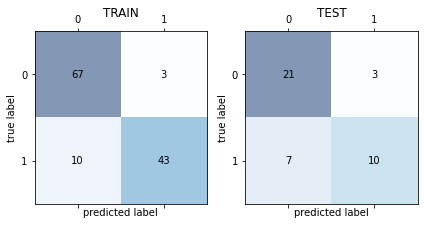

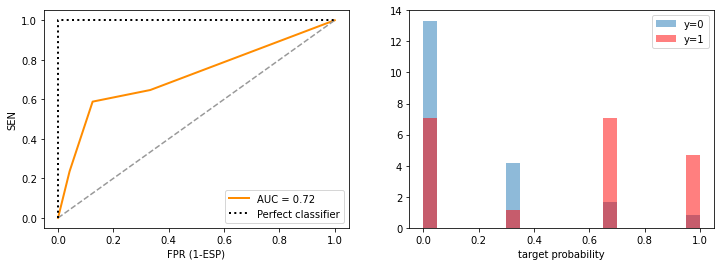

Selected features:  ['donor_age_below_35' 'recipient_age' 'recipient_age_below_10'
 'gender_match' 'ABO_match' 'HLA_mismatch' 'allel' 'stem_cell_source'
 'tx_post_relapse' 'CD3_x1e8_per_kg' 'CD3_to_CD34_ratio' 'ANC_recovery'
 'PLT_recovery' 'acute_GvHD_II_III_IV' 'acute_GvHD_III_IV'
 'time_to_acute_GvHD_III_IV' 'relapse' 'survival_time']


In [60]:
from sklearn.pipeline import make_pipeline
# Model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Customized function
from src.ml_utils import analyze_train_test_performance


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)


my_model = make_pipeline(
    StandardScaler(),
    SelectKBest(mutual_info_classif, k=18), # you might want to try f_classif
    GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1,25)}, cv=3),
)
my_model.fit(X_train, y_train)

# Analyze performance
analyze_train_test_performance(my_model,X_train,X_test,y_train,y_test)

# Selected features
features = X.columns
mask = my_model.named_steps['selectkbest'].get_support()
selected_features = features[mask].values

print('Selected features: ', selected_features)

## Principal Component Analysis (PCA)
We used **PCA as a dimensinality reduction tool** to tranform data from a high dimensional to a low dimensional space. Aditionally, we want to **visualize our feature space** and eventually find redudndant data to get rid of it. 

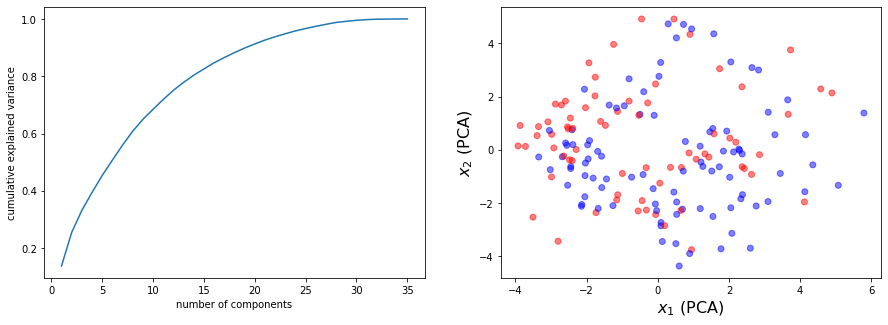

In [75]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


# scaling
X_scaled = StandardScaler().fit_transform(X)

# Number of components
pca = PCA().fit(X_scaled)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(1,X.shape[1]+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Data visualization (just 2 components)
X_pca = PCA(n_components=3).fit_transform(X_scaled)

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0],X_pca[:,1],c=-1*y, cmap=(cm_bright) ,alpha=0.5)
#plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)


plt.show()

After doing the scatter plot of the first component against the second component, we cannot visualize feature groupping in our dataset. There is an overlapping between results that make PCA unuseful. 

In the cumulative explained variance curve, we reassure the fact that reached a point there is no need of more variable to explain the variance of the database. Meaning that at 20 features 90% of the variance is reached. The introduction of more variables would be redundant.  